In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base = "SGD"
filename = f"{base}_exchange_rates.json"

# I had to look up how to get dictionary in the same format as the notes you have
# first function reads json and orient= 'index' swaps the rows and columns
# Second enmurates the rows instead of them being indexed by date
# the date column gets named index when it gets reset so I change it to date to make more sense when graphing
df = pd.read_json(filename, orient= 'index')
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

# convertes date to date time format rather than string
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df.head()

,Date,USD,CNY,JPY,EUR,KRW,GBP,SGD,INR,THB,...,SOS,TZS,UGX,BDT,WST,MNT,VUV,BAM,VES,XCG
0,2012-09-27,0.814287,5.143046,63.251929,0.632232,910.092375,0.502487,1,43.285063,25.208036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-28,0.816030,5.143031,63.366915,0.632165,909.441124,0.503910,1,43.073645,25.142239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-09-29,0.816030,5.143031,63.366915,0.632165,909.441124,0.503910,1,43.073645,25.142239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-09-30,0.816030,5.143031,63.366915,0.632165,909.441124,0.503910,1,43.073645,25.142239,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-10-01,0.813294,5.110511,63.409065,0.631156,907.278061,0.503870,1,42.764883,25.041904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
MajorCurrencies = ["USD", "EUR", "GBP", "JPY", "CNY"]

simplifieddf = df[MajorCurrencies]
simplifieddf.head()

,USD,EUR,GBP,JPY,CNY
0,0.814287,0.632232,0.502487,63.251929,5.143046
1,0.816030,0.632165,0.503910,63.366915,5.143031
2,0.816030,0.632165,0.503910,63.366915,5.143031
3,0.816030,0.632165,0.503910,63.366915,5.143031
4,0.813294,0.631156,0.503870,63.409065,5.110511


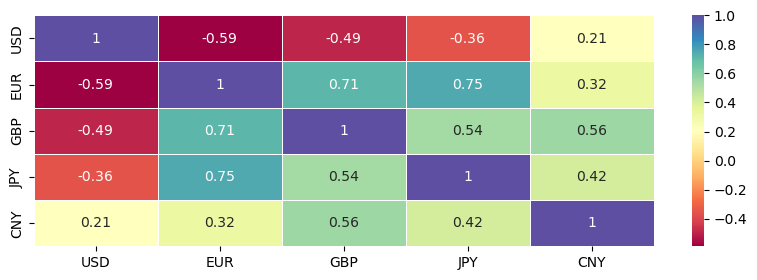

In [4]:
plt.figure(figsize = (10, 3))
#stole straight outta the notes
sns.heatmap(simplifieddf.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

# correlation between exchange rates from SGD to major currencies 
We see the strongest correlation is with JPY with EUR and GBP with EUR. There is also a negative correlation with said currencies and the USD.
After some googling, many of the major currencies strength are affected by the USD. Those countries will go up together when USD gets weaker and visa versa.
The USD to EUR exchange rate has been pretty stable around .80 EUR per USD so the strong negative correlation shows how singapore fits into both economies. When rates go up for one it goes down for the other. 

In [5]:
df.corr()['JPY'].sort_values()

AMD   -0.853641
BYR   -0.777491
ALL   -0.694579
GNF   -0.679781
CHF   -0.581246
         ...   
GMD    0.930462
BDT    0.947486
LAK    0.981309
JPY    1.000000
SGD         NaN
Name: JPY, Length: 156, dtype: float64

Another unique correlation is how the exchange rate with japan has a positive correlation with a bunch of small countries. 
GMD is gambia
BDT is bangladesh
LAK is Laos

Because of japans recent weakening of yen, they're following the trend of other less well off countries despite being a global power.

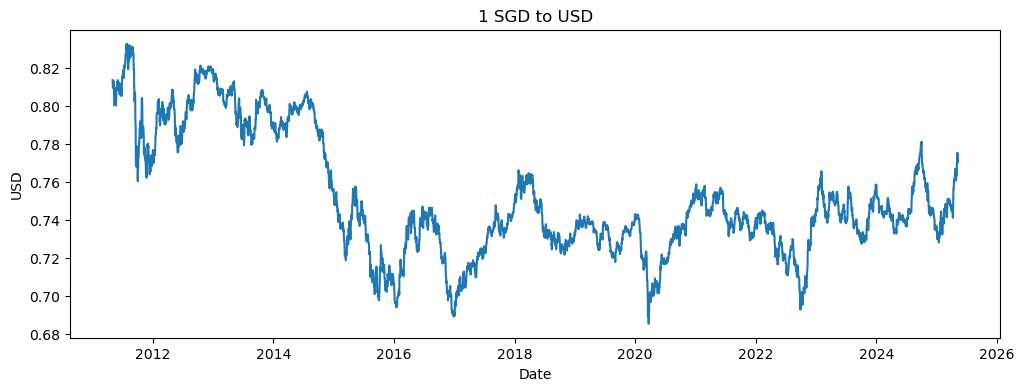

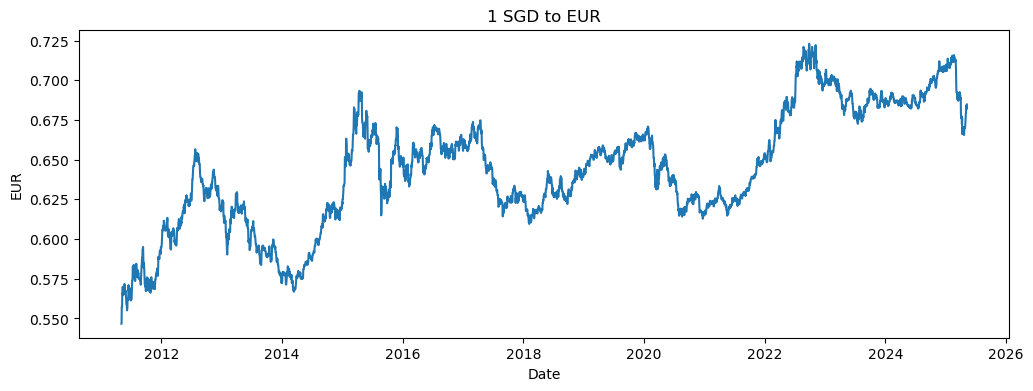

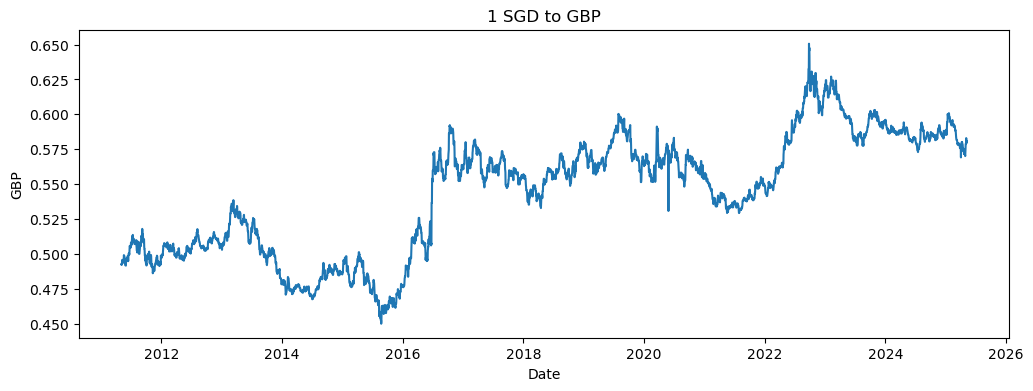

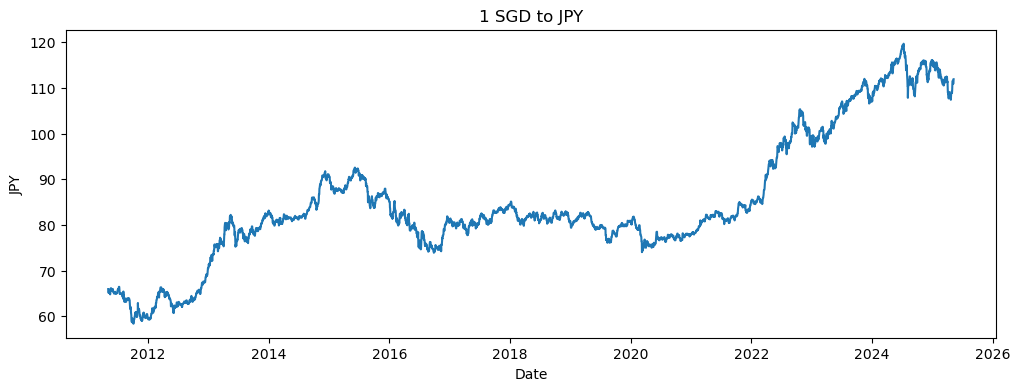

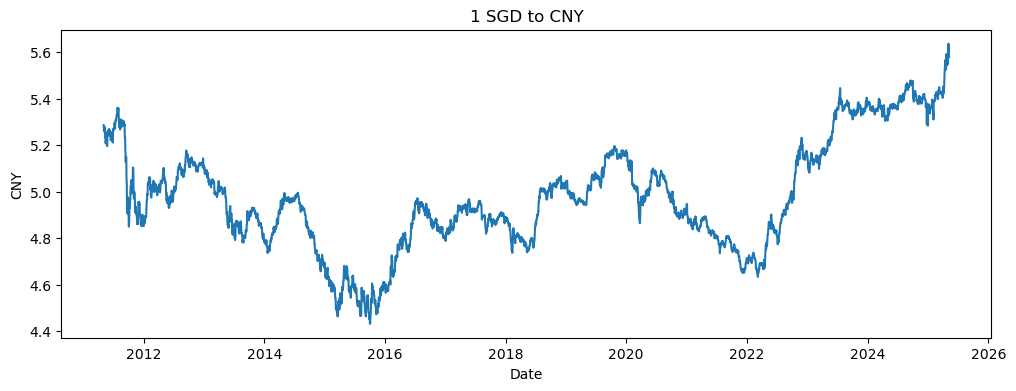

In [6]:
MajorCurrencies = ["USD", "EUR", "GBP", "JPY", "CNY"]
for currency in MajorCurrencies:
    plt.figure(figsize=(12, 4))
    sns.lineplot(x='Date', y=currency, data=df)
    plt.title(f"1 SGD to {currency}")
    plt.show()

# Transient Response
Exchanging to USD had a big drop in 2015.
The USD had a big increase at that time due to them increasing reserve interest rates while other countries were struggling to do the same. This caused investors to assume the USD had more to offer because it cost more to borrow increasing its value.

The singaporean dollar has a positive correlation with USD according to internet. So when USD spiked in 2015, the Euro was pulled down since they have a negative correlation and singapore followed the USD sligtly up making the SGD increase in power while the EUR decreased.

Exchange rate spike in 2016.
Brexit devalued the british pound. 

